In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

In [19]:
df = pd.read_csv('data/IFC-POWER_BI.csv', sep=';')
df.head()

C:\Users\dgm\AppData\Local\Temp\ipykernel_27008\3092402695.py:1: DtypeWarning: Columns (2,3,4,5,6,7,17,18,19,20,32,34,35,36,37,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/IFC-POWER_BI.csv', sep=';')


,Model,GUID,ExtrusionX (mm),ExtrusionY (mm),ExtrusionZ (mm),OriginX (mm),OriginY (mm),OriginZ (mm),XDirX,XDirY,...,HEIGHT (mm),AREA_PGZ (m²),AREA (m²),PROFILE,WIDTH (mm),WEIGHT (t),PROFILE.CROSS_SECTION_AREA (m²),Common Type,LU Pos.Number,DU Pos.Number
0,D3D-FHE-62-0-100-0100.ifc,3Mv$UOTqD9EvWHVMq8frFc,--,--,--,--,--,--,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN
1,D3D-FHE-62-0-100-0100.ifc,15Rplo6$D6z9$_ZJg$mSO3,--,--,--,--,--,--,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN
2,D3D-FHE-62-0-100-0100.ifc,3pRgtIyjn6_OxTS1U2DxyP,--,--,--,--,--,--,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN
3,D3D-FHE-62-0-100-0100.ifc,3gZuyFNqr2W9mTmQr0TiJI,--,--,--,--,--,--,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN
4,D3D-FHE-62-0-100-0100.ifc,0onthEMq14_Ohw7ELHHzzY,--,--,--,--,--,--,NaN,NaN,...,--,--,--,D18,--,0.0,--,MECHANICALFASTENER,NaN,NaN


In [20]:
df.shape

(99735, 45)

In [21]:
df.describe()

,XDirX,XDirY,XDirZ,ASSEMBLY.ID,LENGTH (mm),WEIGHT (t),LU Pos.Number,DU Pos.Number
count,68778.000000,68778.000000,68778.000000,9.970700e+04,99735.000000,99735.000000,6282.0,6282.000000
mean,-0.020516,0.046137,0.040834,5.819895e+08,563.366902,0.020155,999.0,924.521490
std,0.654881,0.597477,0.458203,1.394886e+08,1422.566265,0.137315,0.0,42.738914
min,-1.000000,-1.000000,-1.000000,2.495283e+06,0.000000,0.000000,999.0,900.000000
25%,-0.000002,0.000000,0.000000,5.846692e+08,70.000000,0.000000,999.0,900.000000
50%,0.000000,0.000000,0.000000,6.162416e+08,176.000000,0.002000,999.0,900.000000
75%,0.000000,0.000000,0.000000,6.396304e+08,448.000000,0.006000,999.0,900.000000
max,1.000000,1.000000,1.000000,6.541924e+08,37572.000000,15.471000,999.0,999.000000


In [23]:
df.dtypes

Model                               object
GUID                                object
ExtrusionX (mm)                     object
ExtrusionY (mm)                     object
ExtrusionZ (mm)                     object
OriginX (mm)                        object
OriginY (mm)                        object
OriginZ (mm)                        object
XDirX                              float64
XDirY                              float64
XDirZ                              float64
Last Modified Date                  object
Product Object Type                 object
Change Action                       object
Owning User                         object
Product Description                 object
Product Name                        object
CenterOfGravityX (mm)               object
CenterOfGravityY (mm)               object
CenterOfGravityZ (mm)               object
Volume (m³)                         object
NAME                                object
ASSEMBLY.ID                        float64
CONTENTTYPE

In [31]:
df = df[['OriginX (mm)', 'OriginY (mm)', 'OriginZ (mm)']]
df.dropna(inplace=True)
df.rename(columns={'OriginX (mm)' : 'X', 'OriginY (mm)': 'Y', 'OriginZ (mm)' : 'Z'}, inplace=True)

In [32]:
df.dtypes

X    object
Y    object
Z    object
dtype: object

In [42]:
df = df[pd.to_numeric(df['X'], errors='coerce').notnull()]

In [45]:
df.X = pd.to_numeric(df['X'])
df.Y = pd.to_numeric(df['Y'])
df.Z = pd.to_numeric(df['Z'])
df.describe()

,X,Y,Z
count,68778.000000,68778.000000,68778.000000
mean,163064.627206,47418.582483,14249.135785
std,14564.369910,12275.742075,10069.287284
min,135186.000000,19150.000000,-4007.000000
25%,151085.000000,38094.000000,6798.000000
50%,162618.000000,46715.000000,12310.000000
75%,174403.000000,55237.500000,20651.000000
max,236221.000000,81010.000000,44171.000000


In [48]:
df.describe()

,X,Y,Z
count,68778.000000,68778.000000,68778.000000
mean,163064.627206,47418.582483,14249.135785
std,14564.369910,12275.742075,10069.287284
min,135186.000000,19150.000000,-4007.000000
25%,151085.000000,38094.000000,6798.000000
50%,162618.000000,46715.000000,12310.000000
75%,174403.000000,55237.500000,20651.000000
max,236221.000000,81010.000000,44171.000000


In [50]:
df['R'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)
df.describe()

,X,Y,Z,R
count,68778.000000,68778.000000,68778.000000,68778.000000
mean,163064.627206,47418.582483,14249.135785,171151.191179
std,14564.369910,12275.742075,10069.287284,14598.076899
min,135186.000000,19150.000000,-4007.000000,139976.875283
25%,151085.000000,38094.000000,6798.000000,159669.526265
50%,162618.000000,46715.000000,12310.000000,170918.931440
75%,174403.000000,55237.500000,20651.000000,182437.887783
max,236221.000000,81010.000000,44171.000000,239045.096660


In [51]:
df.head()

,X,Y,Z,R
326,203910,28965,850,205958.689608
347,186050,27530,271,188075.986880
355,210818,29325,5729,212924.883914
366,193450,22518,8450,194939.388847
377,189074,21000,10797,190542.784395


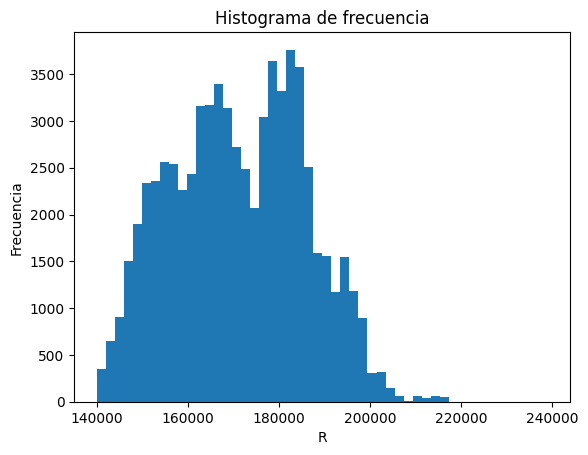

In [57]:
%matplotlib inline
plt.hist(df['R'], bins=50)
plt.gca().set(title='Histograma de frecuencia', ylabel='Frecuencia', xlabel='R');

In [59]:
cov = EllipticEnvelope(random_state=0)
x = np.array(df['R']).reshape(-1 , 1)
cov.fit(x)

EllipticEnvelope(random_state=0)

In [60]:
z = cov.decision_function(x)

In [69]:
cov.decision_function()

ValueError: Expected 2D array, got 1D array instead:
array=[123].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

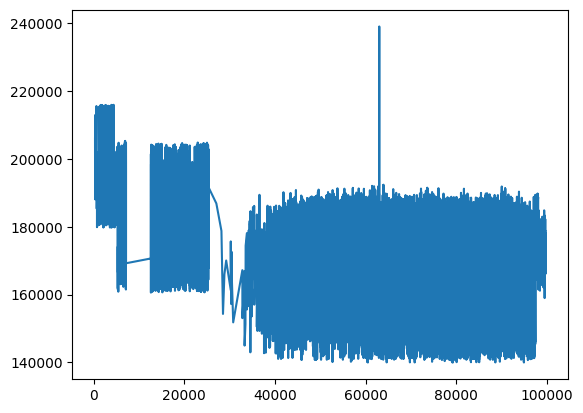

In [67]:
plt.plot(df['R'])

In [106]:
xx1, yy1 = np.meshgrid(np.linspace(df.X.min()*0.9, df.X.max()*1.1, 50), np.linspace(df.Y.min()*0.9, df.Y.max()*1.1, 50))
cov.fit(df[['X','Y']])

EllipticEnvelope(random_state=0)

In [88]:
z1 = cov.decision_function(np.c_[xx1.ravel(), yy1.ravel()])

c:\Users\dgm\projects\IDI-BIM-MACHINE_LEARNING\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Y (mm)')

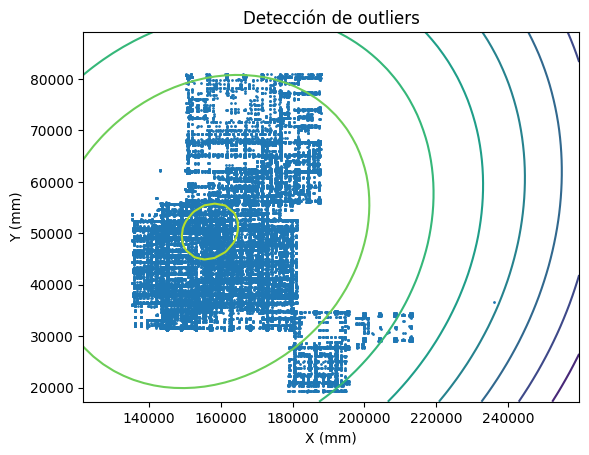

In [110]:
plt.figure(1)
plt.title('Detección de outliers')
plt.scatter(df['X'], df['Y'], s=1)
plt.contour(xx1, yy1, z1.reshape(xx1.shape))
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.xlim((df['X'].min()*0.9, df['X'].max()*1.1))
plt.ylim((df['Y'].min()*0.9, df['Y'].max()*1.1))
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')

In [ ]:
ocsvm = OneClassSVM(nu=0.25, gamma=0.35)